<a href="https://www.kaggle.com/code/elifnurylmaz/supermarket-sales-eda-ml?scriptVersionId=229242100" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000



* **unit price:** price of the each product in $.
* **quantity:** number of products purchased by the customer. 


In [5]:
data.shape

(1000, 17)

In [6]:
data.index

RangeIndex(start=0, stop=1000, step=1)

In [7]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [11]:
data.drop("Invoice ID",axis = 1,  inplace = True)

In [12]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [13]:
data.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [14]:
data.nunique()

Branch                       3
City                         3
Customer type                2
Gender                       2
Product line                 6
Unit price                 943
Quantity                    10
Tax 5%                     990
Total                      990
Date                        89
Time                       506
Payment                      3
cogs                       990
gross margin percentage      1
gross income               990
Rating                      61
dtype: int64

In [15]:
data["Branch"].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
data["Branch"].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [17]:
data["City"].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [18]:
data["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

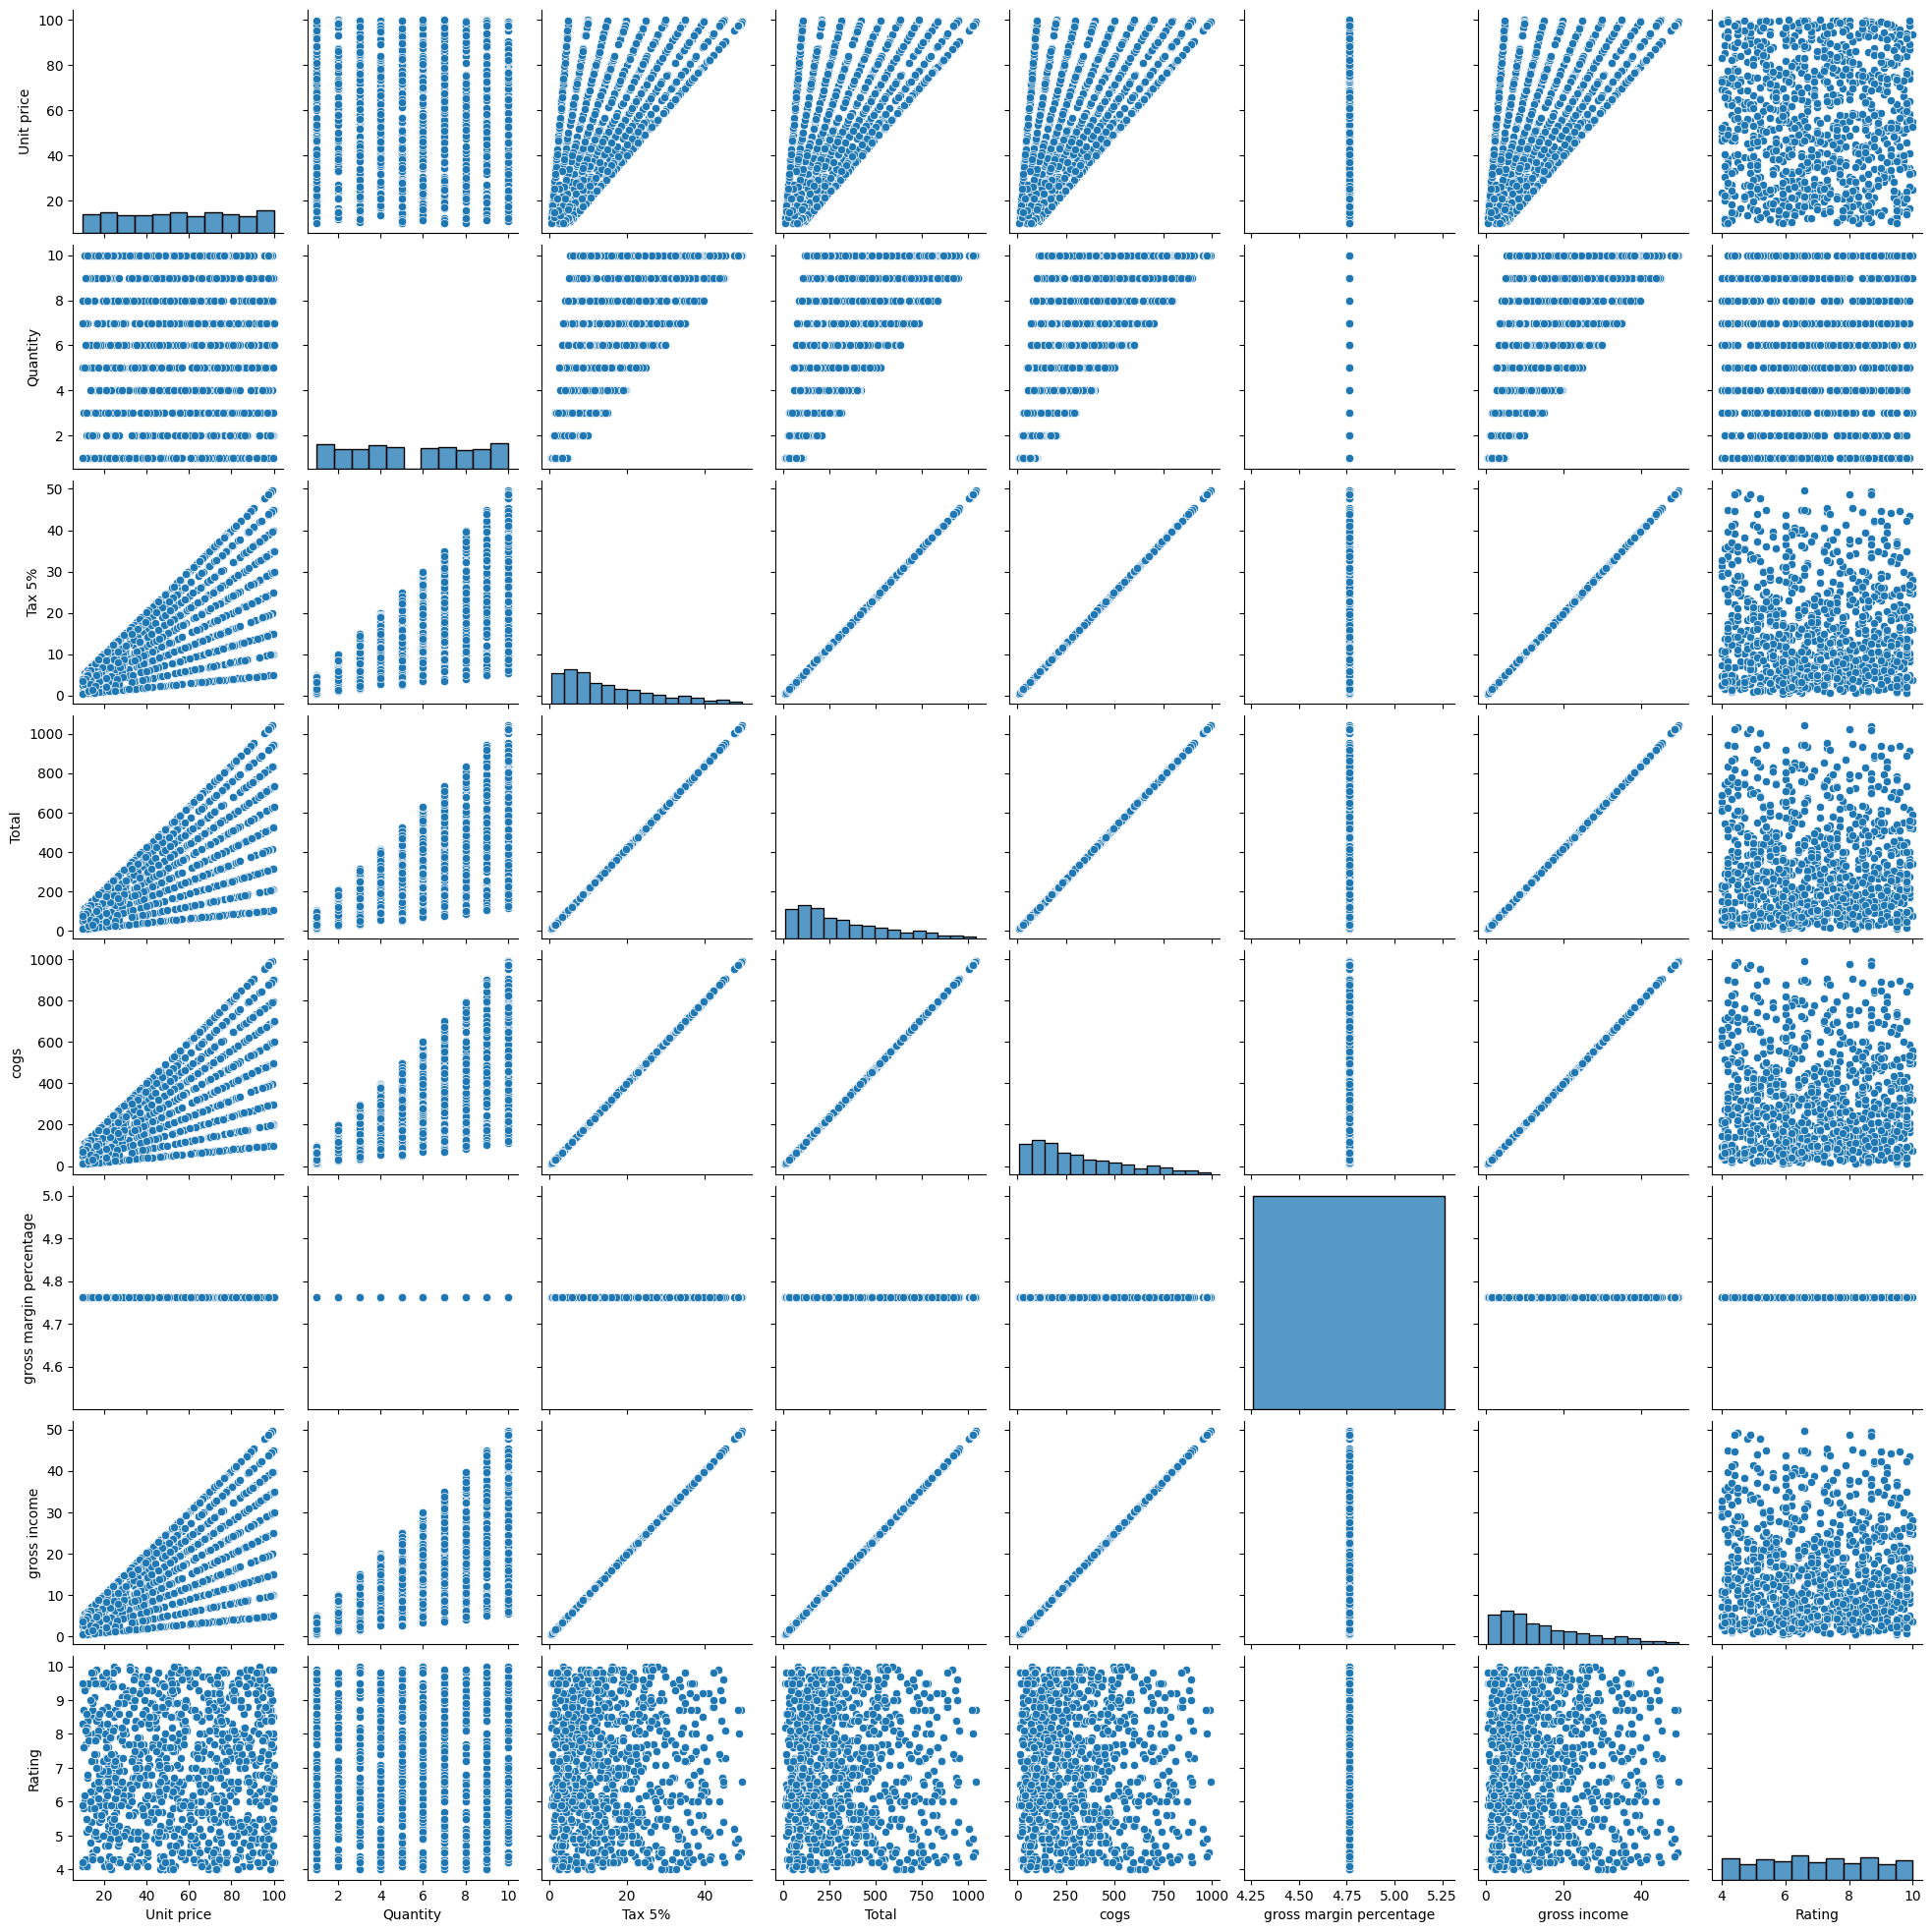

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
sns.pairplot(data)

In [20]:
branch = np.array(data["Branch"].unique())
branch

array(['A', 'C', 'B'], dtype=object)

In [21]:
city = np.array(data["City"].unique())
city

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [22]:
branch_city = data.groupby(["City", "Branch"]).size().unstack(fill_value = 0)
print(branch_city)

Branch       A    B    C
City                    
Mandalay     0  332    0
Naypyitaw    0    0  328
Yangon     340    0    0


In [23]:
data["Product line"].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [24]:
productline_city = data.groupby(["Product line", "City"]).size(). unstack(fill_value = 0)
productline_city

City,Mandalay,Naypyitaw,Yangon
Product line,,,
Electronic accessories,55,55,60
Fashion accessories,62,65,51
Food and beverages,50,66,58
Health and beauty,53,52,47
Home and lifestyle,50,45,65
Sports and travel,62,45,59


<Figure size 640x480 with 0 Axes>

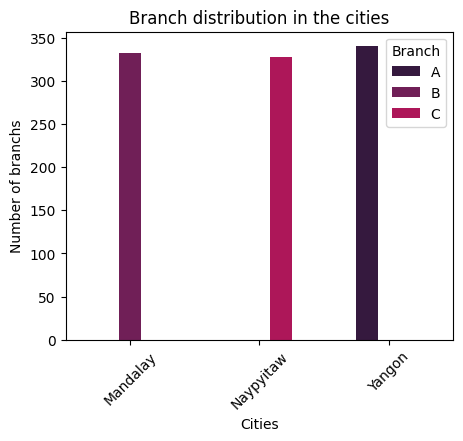

In [25]:
colors = sns.color_palette("rocket", n_colors=len(productline_city))
import matplotlib.pyplot as plt
plt.figure()
branch_city.plot(kind='bar', figsize=(5, 4), color = colors)
plt.title("Branch distribution in the cities")
plt.xlabel("Cities")
plt.ylabel("Number of branchs")
plt.xticks(rotation=45)
plt.legend(title="Branch")
plt.show()




In [26]:
data["Customer type"].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [27]:
data["Gender"].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [28]:
gender_customer = data.groupby(["Customer type", "Gender"]).size().unstack(fill_value = 0)
gender_customer

Gender,Female,Male
Customer type,,
Member,261,240
Normal,240,259


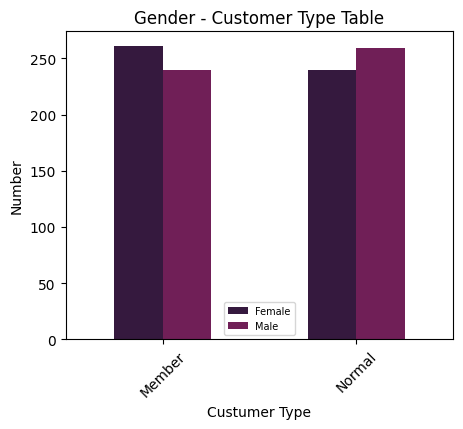

In [29]:
colors = sns.color_palette("rocket", n_colors=len(productline_city))
gender_customer.plot(kind = "bar", figsize = (5,4), color = colors)
plt.title("Gender - Customer Type Table")
plt.xlabel("Custumer Type")
plt.ylabel("Number")
plt.xticks(rotation=45)
plt.legend(loc = "best", fontsize = 7)
plt.show()

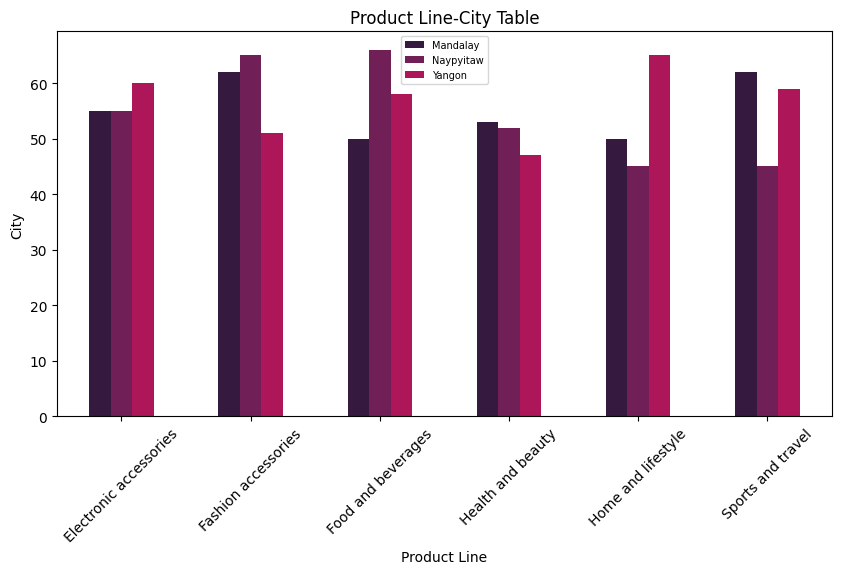

In [30]:
colors = sns.color_palette("rocket", n_colors=len(productline_city))
productline_city.plot(kind = "bar", figsize=(10,5), color = colors)
plt.xlabel("Product Line")
plt.ylabel("City")
plt.title("Product Line-City Table")
plt.xticks(rotation = 45)
plt.legend(loc = "best", fontsize = 7)
plt.show()

In [31]:
data.groupby(["Product line","Quantity"]).size()

Product line            Quantity
Electronic accessories  1           20
                        2            8
                        3           16
                        4           19
                        5           17
                        6           19
                        7           16
                        8           17
                        9           16
                        10          22
Fashion accessories     1           30
                        2           22
                        3           14
                        4           21
                        5           15
                        6            8
                        7           21
                        8           12
                        9           14
                        10          21
Food and beverages      1           15
                        2           16
                        3           23
                        4           18
                        5      

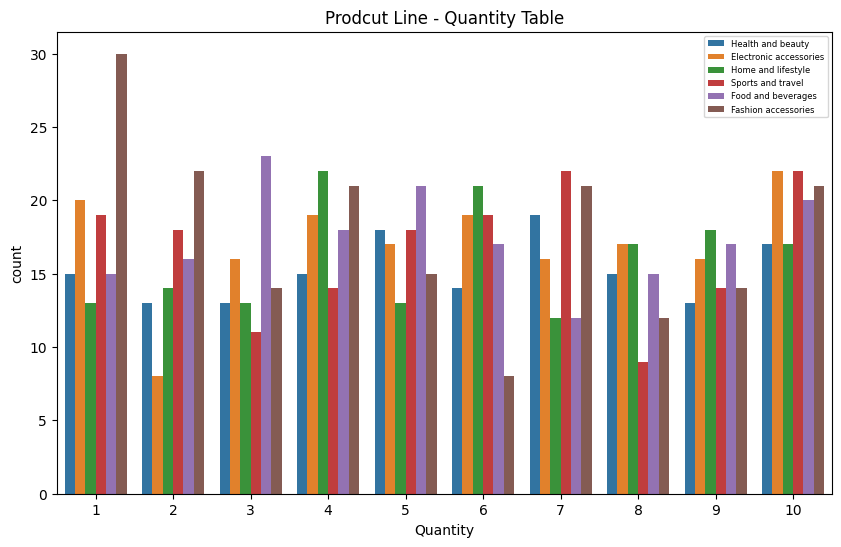

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x = "Quantity", hue = "Product line", data = data)
plt.title("Prodcut Line - Quantity Table")
plt.legend(loc = "best", fontsize = 6)
plt.show()

In [33]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time

def classify_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

data['DayPeriod'] = data['Time'].apply(classify_time)


print(data)


    Branch       City Customer type  Gender            Product line  \
0        A     Yangon        Member  Female       Health and beauty   
1        C  Naypyitaw        Normal  Female  Electronic accessories   
2        A     Yangon        Normal    Male      Home and lifestyle   
3        A     Yangon        Member    Male       Health and beauty   
4        A     Yangon        Normal    Male       Sports and travel   
..     ...        ...           ...     ...                     ...   
995      C  Naypyitaw        Normal    Male       Health and beauty   
996      B   Mandalay        Normal  Female      Home and lifestyle   
997      A     Yangon        Member    Male      Food and beverages   
998      A     Yangon        Normal    Male      Home and lifestyle   
999      A     Yangon        Member  Female     Fashion accessories   

     Unit price  Quantity   Tax 5%      Total       Date      Time  \
0         74.69         7  26.1415   548.9715   1/5/2019  13:08:00   
1      

In [34]:
data[["Time", "DayPeriod"]].head()

,Time,DayPeriod
0,13:08:00,Afternoon
1,10:29:00,Morning
2,13:23:00,Afternoon
3,20:33:00,Evening
4,10:37:00,Morning


Text(0.5, 1.0, 'Day Period-City Table')

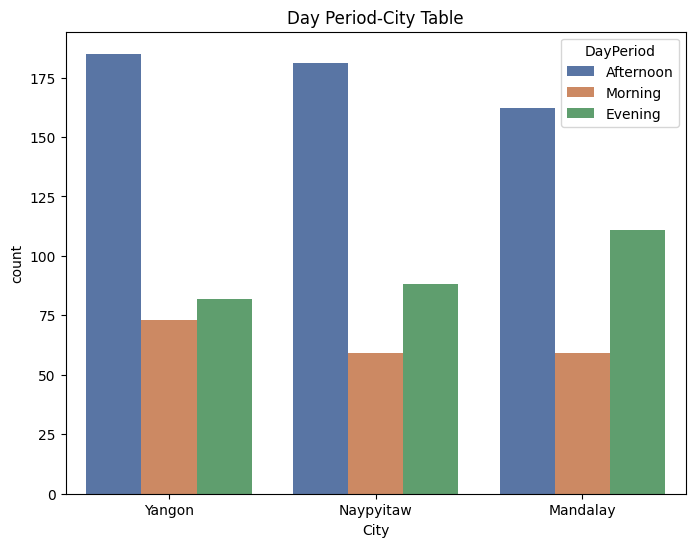

In [35]:
fig, ax = plt.subplots(figsize= (8,6))
sns.countplot(x = "City", hue = "DayPeriod", data = data,  palette = "deep")
plt.title("Day Period-City Table")

Text(0.5, 1.0, 'Gender-Day Period Table')

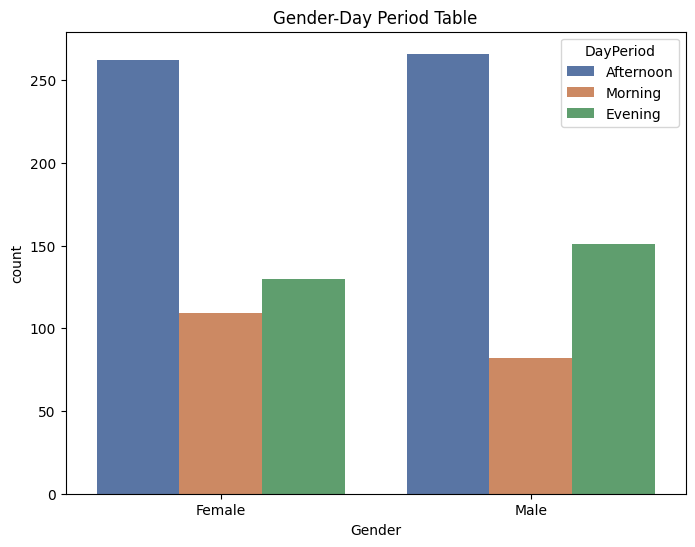

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x = "Gender", hue = "DayPeriod", data = data,  palette = "deep")
plt.title("Gender-Day Period Table")

Text(0.5, 1.0, 'Customer type- Day Period Table')

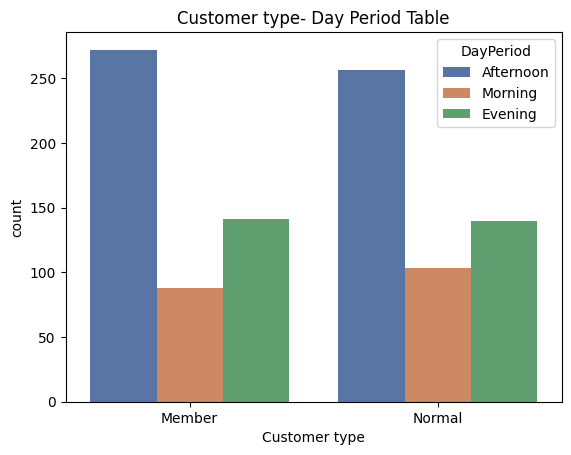

In [37]:
sns.countplot(x = "Customer type", hue = "DayPeriod", data = data, palette = "deep")
plt.title("Customer type- Day Period Table")

Text(0.5, 1.0, 'Day Period-Quantity Table')

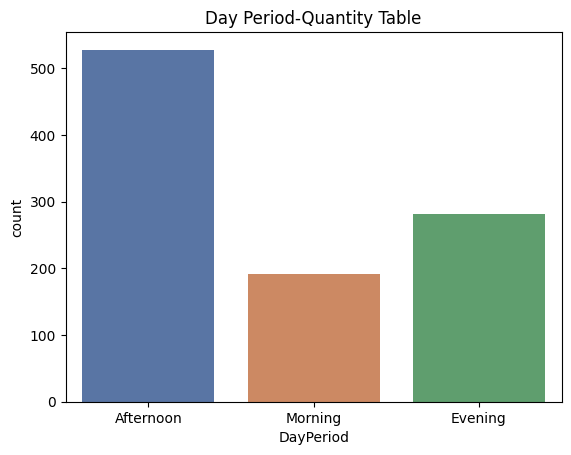

In [38]:
sns.countplot(x = "DayPeriod", data = data,  palette = "deep")
plt.title("Day Period-Quantity Table")

In [39]:
data.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'DayPeriod'],
      dtype='object')

Text(0.5, 1.0, 'Payment Counts Table')

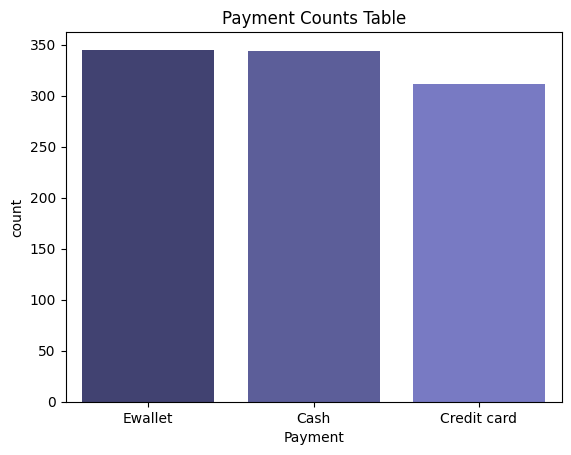

In [40]:
sns.countplot(x="Payment", data= data, palette= "tab20b")
plt.title("Payment Counts Table")

Text(0.5, 1.0, 'City-Payment Table')

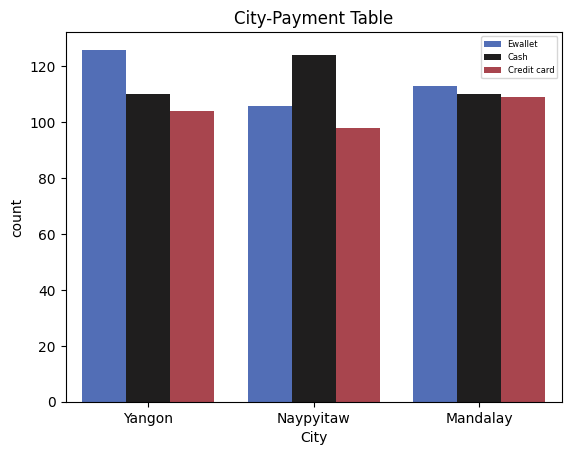

In [41]:
sns.countplot(x= "City", hue = "Payment", data = data, palette= "icefire")
plt.legend(loc = "best", fontsize = 6)
plt.title("City-Payment Table")

Text(0.5, 1.0, 'Gender-Payment Table')

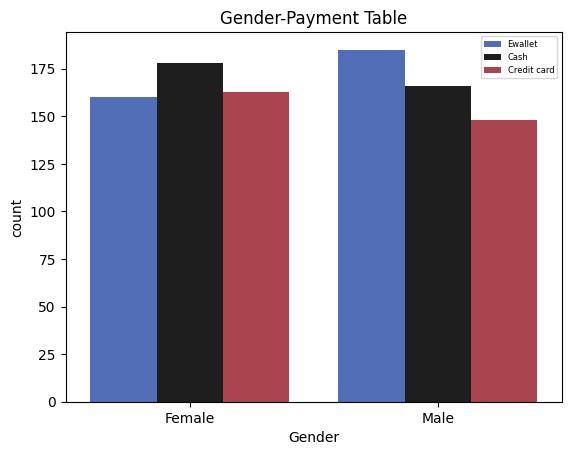

In [42]:
sns.countplot(x= "Gender", hue = "Payment", data = data, palette= "icefire")
plt.legend(loc = "best", fontsize = 6)
plt.title("Gender-Payment Table")

Text(0.5, 1.0, 'Customer type-Payment Table')

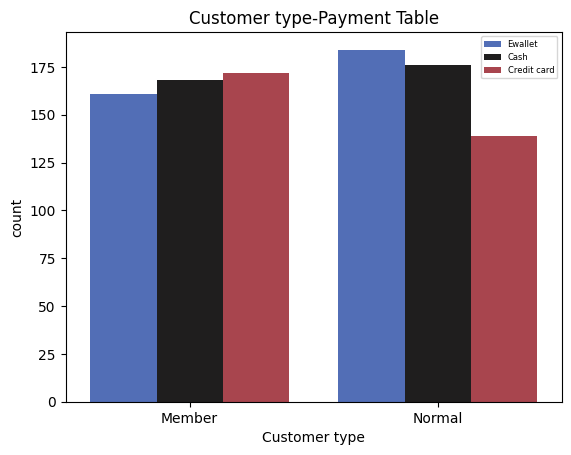

In [43]:
sns.countplot(x= "Customer type", hue = "Payment", data = data, palette= "icefire")
plt.legend(loc = "best", fontsize = 6)
plt.title("Customer type-Payment Table")

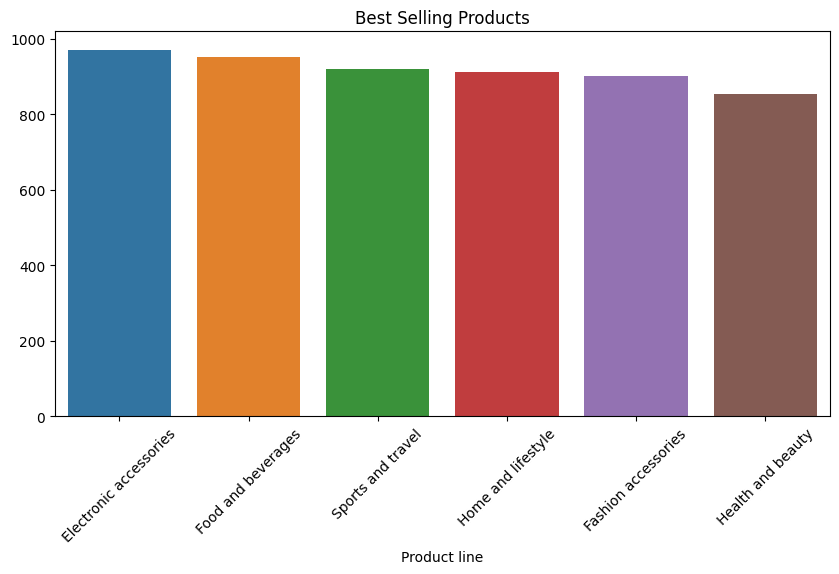

In [44]:
top_products = data.groupby("Product line")["Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=45)
plt.title("Best Selling Products")
plt.show()




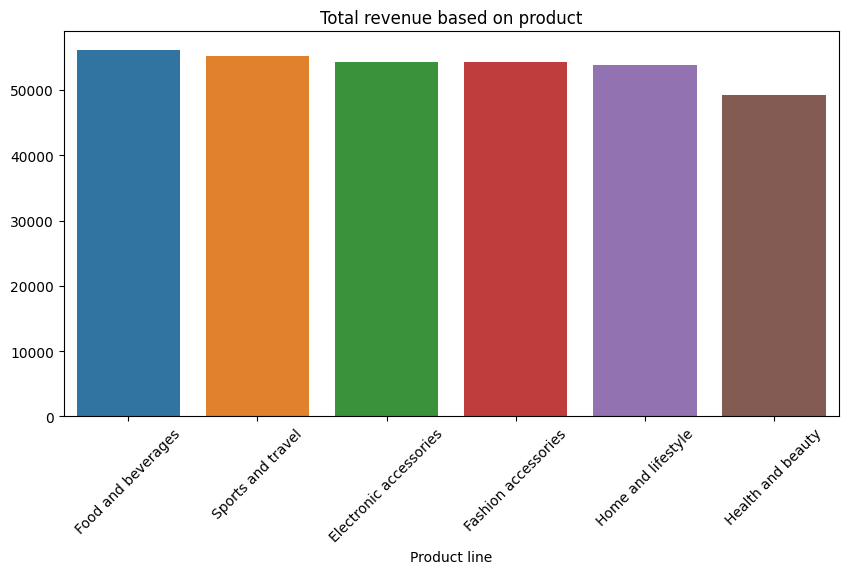

In [45]:
top_revenue = data.groupby("Product line")["Total"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_revenue.index, y=top_revenue.values)
plt.xticks(rotation=45)
plt.title("Total revenue based on product")
plt.show()


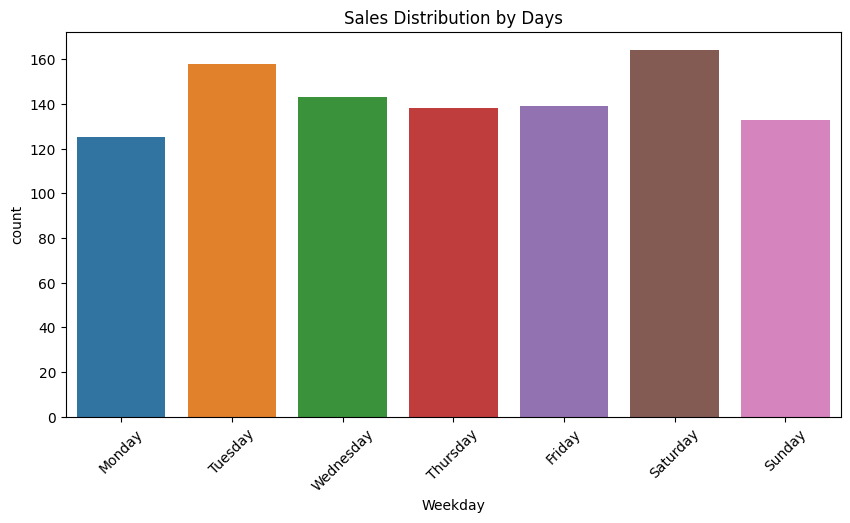

In [46]:
data["Date"] = pd.to_datetime(data["Date"])
data["Weekday"] = data["Date"].dt.day_name()


plt.figure(figsize=(10, 5))
sns.countplot(x="Weekday", data=data, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Sales Distribution by Days")
plt.xticks(rotation=45)
plt.show()


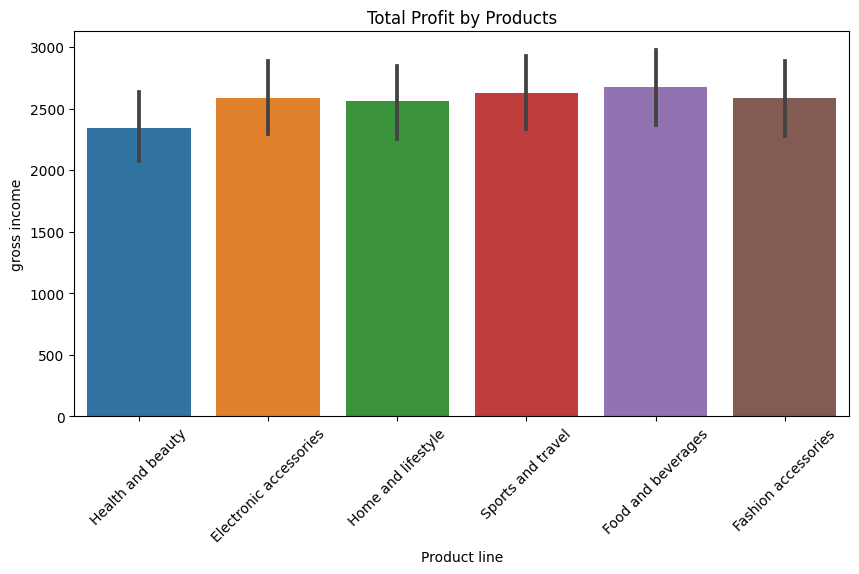

In [47]:

plt.figure(figsize=(10, 5))
sns.barplot(x="Product line", y="gross income", data=data, estimator=sum)
plt.xticks(rotation=45)
plt.title("Total Profit by Products")
plt.show()


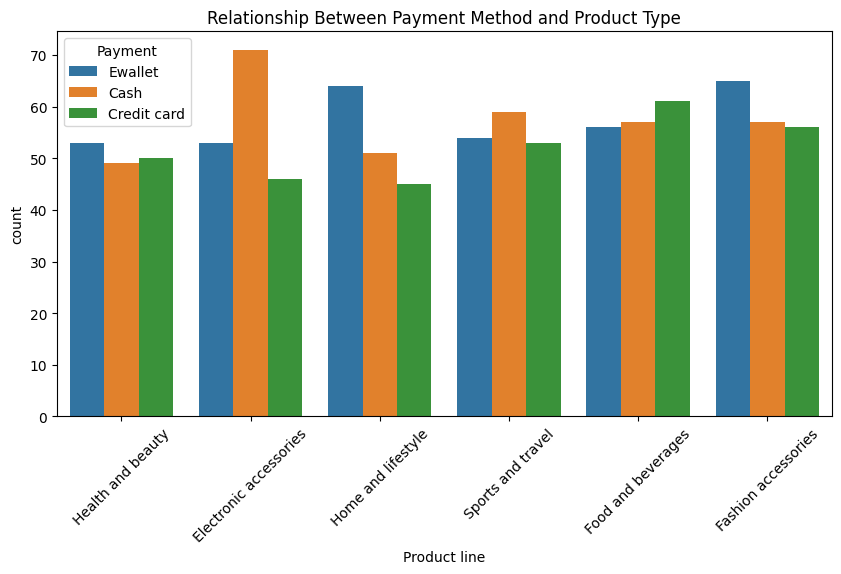

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Product line", hue="Payment", data=data)
plt.title("Relationship Between Payment Method and Product Type")
plt.xticks(rotation=45)
plt.show()


We can't use categorical and numeric features directly for the linear regression model. 
To do this, we have to handle one-hot encoding.
One Hot Encoding eliminates this risk by treating each category independently.
We are assigning a True false values for each category. for example,  BranchA= false, BranchB=false, BranchC=true. So it says that branch type is C. 


In [49]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score


encoder = OneHotEncoder(drop='first', sparse=False) # it just drop the first category to avoid the dummy trap. sparse=False handle the results to be a numpy array.
encoded_cats = encoder.fit_transform(data[['Product line', 'Weekday', 'DayPeriod', 'Payment']]) # learn the unique categories 
#from dataset and transform them into one-hot format.
#encoded_Cats is a numpy array where each categorical columns is replaced with multiple binary columns. 
encoded_columns = encoder.get_feature_names_out(['Product line','Weekday', 'DayPeriod', 'Payment'])
#get_feature_names_out returns the names of the new one-hot encoded dataset. 
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_columns)
numeric_features = data[['Unit price', 'Quantity']]
X = pd.concat([numeric_features, encoded_df], axis=1)
y = data['Total']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.3, random_state= 4)





In [50]:
X.head()

,Unit price,Quantity,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,DayPeriod_Evening,DayPeriod_Morning,Payment_Credit card,Payment_Ewallet
0,74.69,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,15.28,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,46.33,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,58.22,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,86.31,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [51]:
y.head()

0    548.9715
1     80.2200
2    340.5255
3    489.0480
4    634.3785
Name: Total, dtype: float64

In [52]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")



Mean Absolute Error: 63.882582719831525
Mean Squared Error: 7042.923723965905


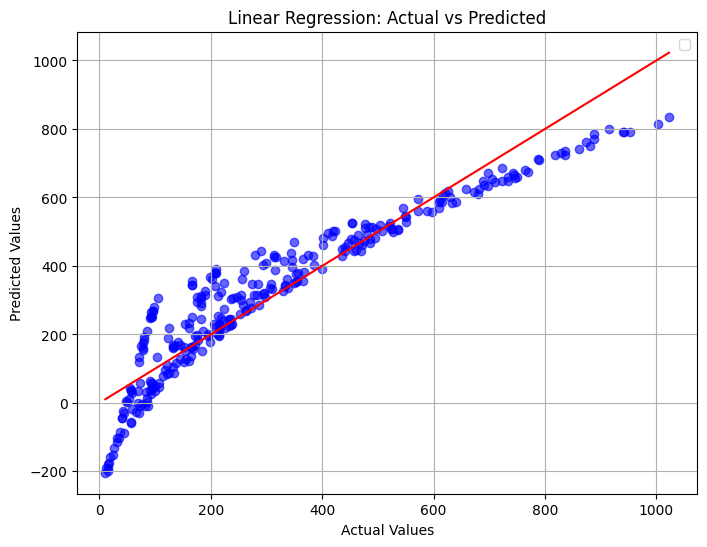

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.6, color="blue")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red' )
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [54]:
encoder = OneHotEncoder(drop='first', sparse=False) # it just drop the first category to avoid the dummy trap. sparse=False handle the results to be a numpy array.
encoded_cats = encoder.fit_transform(data[['Product line', 'Weekday', 'DayPeriod', 'Payment']]) # learn the unique categories 
#from dataset and transform them into one-hot format.
#encoded_Cats is a numpy array where each categorical columns is replaced with multiple binary columns. 
encoded_columns = encoder.get_feature_names_out(['Product line','Weekday', 'DayPeriod', 'Payment'])
#get_feature_names_out returns the names of the new one-hot encoded dataset. 
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_columns)
numeric_features = data[['Unit price', 'Quantity']]
X = pd.concat([numeric_features, encoded_df], axis=1)
y = data['Total']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.3, random_state= 4)

decision_tree_regressor = DecisionTreeRegressor()
tree_regressor_model = decision_tree_regressor.fit(X_train, y_train)
tree_y_pred = decision_tree_regressor.predict(X_val)
mae_tree = mean_absolute_error(y_val,tree_y_pred )
mse_tree = mean_squared_error(y_val, tree_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, tree_y_pred)
print(f"mean absolute error for decision tree regressor : {mae}")
print(f"mean squared error for decision tree regressor : {mse}")
print(f"RMSE: {rmse:.2f}")



mean absolute error for decision tree regressor : 63.882582719831525
mean squared error for decision tree regressor : 7042.923723965905
RMSE: 83.92


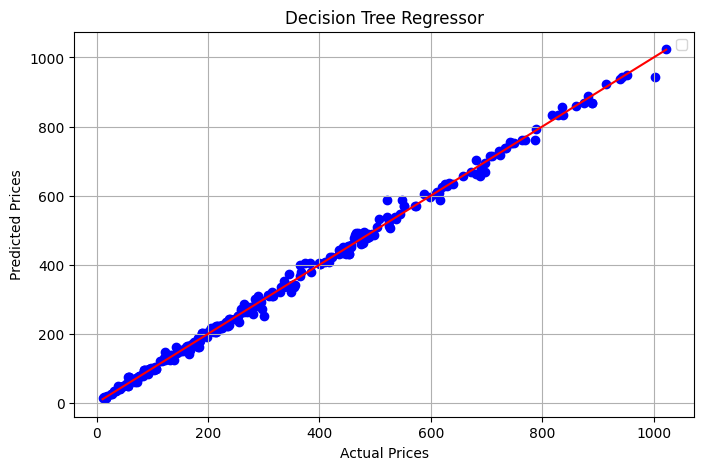

In [55]:
plt.figure(figsize = (8,5))
plt.scatter(y_val, tree_y_pred, color = "blue")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red' )
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree Regressor")
plt.legend()
plt.grid(True)
plt.show()


**Decision Tree Regressor is overfitted!!!!**
we can solve this problem with regularization. 

In [56]:
model = DecisionTreeRegressor()
decision_tree_models = { "Decision Tree with max_depth = 1": DecisionTreeRegressor(max_depth = 1, random_state = 0),
                        "Decision Tree with max_depth = 5": DecisionTreeRegressor(max_depth = 5, random_state = 0),
                        "Decision Tree with max_depth = 7": DecisionTreeRegressor(max_depth = 7, random_state = 0),
                        "Decision Tree with max_depth = 8": DecisionTreeRegressor(max_depth = 8, random_state = 0),
                        "Decision Tree with no assigned max_depth": DecisionTreeRegressor(random_state = 0)
    
}

desicion_tree_results = {}


In [57]:
for name, model in decision_tree_models.items():
    model.fit(X_train, y_train)
    y_predictions = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_predictions)
    r2 = r2_score(y_val, y_predictions)
    desicion_tree_results[name] = mae
    print(f"Model: {name}, MAE: {mae:.2f}")
    print(f"Model: {name}, R2: {r2:.2f}")
    

Model: Decision Tree with max_depth = 1, MAE: 143.30
Model: Decision Tree with max_depth = 1, R2: 0.43
Model: Decision Tree with max_depth = 5, MAE: 33.98
Model: Decision Tree with max_depth = 5, R2: 0.96
Model: Decision Tree with max_depth = 7, MAE: 13.49
Model: Decision Tree with max_depth = 7, R2: 0.99
Model: Decision Tree with max_depth = 8, MAE: 10.05
Model: Decision Tree with max_depth = 8, R2: 1.00
Model: Decision Tree with no assigned max_depth, MAE: 7.99
Model: Decision Tree with no assigned max_depth, R2: 1.00


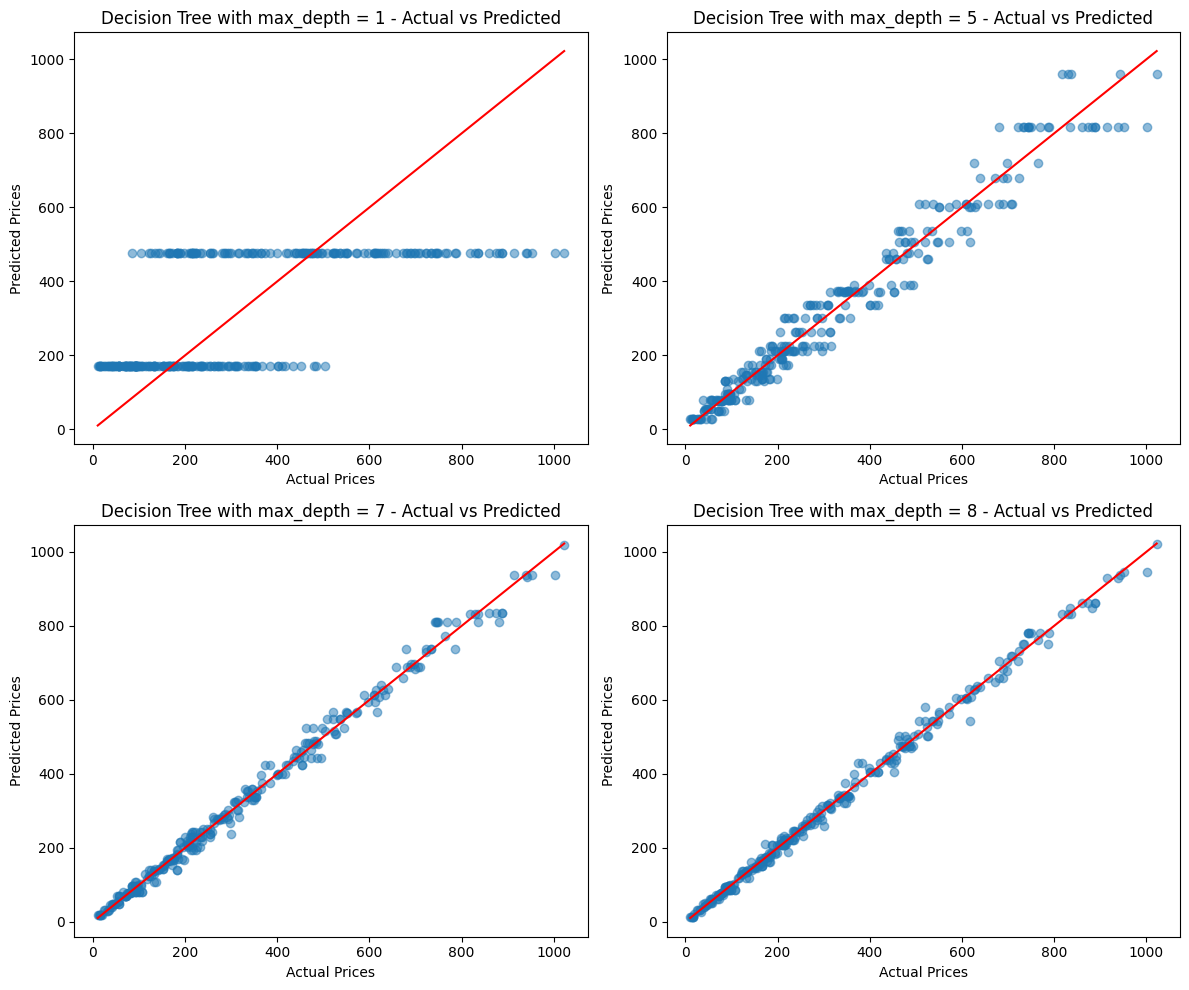

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten() 
for i, (name, model) in enumerate(decision_tree_models.items()):
    if i >= len(axes):  # Eğer subplot sınırlarını aşarsak döngüden çık
        break
        
    predictions = model.predict(X_val) 
    ax = axes[i]
    ax.scatter(y_val, predictions, alpha=0.5)
    ax.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')
    ax.set_xlabel("Actual Prices")
    ax.set_ylabel("Predicted Prices")
    ax.set_title(f"{name} - Actual vs Predicted")
plt.tight_layout() 
plt.show()

Mean Absolute Error: 7.996905
Mean Squared Error: 145.31735058645003
Model Accuracy (R² Score): 1.00


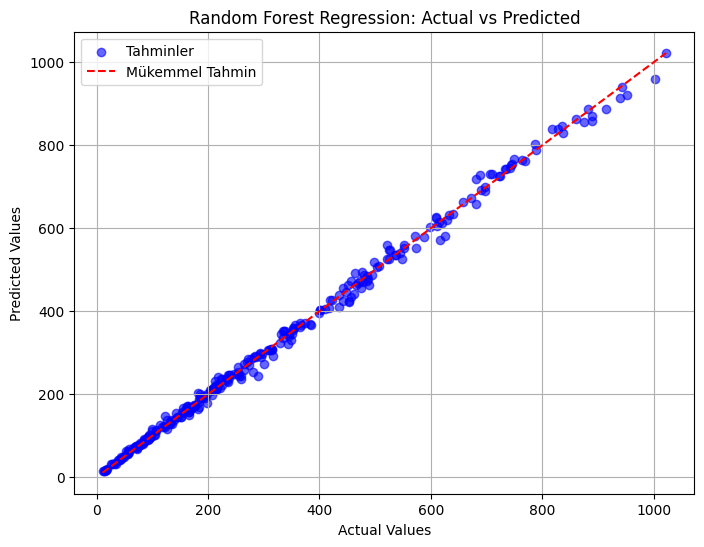

In [59]:
from sklearn.ensemble import RandomForestRegressor

encoder = OneHotEncoder(drop='first', sparse=False) # it just drop the first category to avoid the dummy trap. sparse=False handle the results to be a numpy array.
encoded_cats = encoder.fit_transform(data[['Product line', 'Weekday', 'DayPeriod', 'Payment']]) # learn the unique categories 
#from dataset and transform them into one-hot format.
#encoded_Cats is a numpy array where each categorical columns is replaced with multiple binary columns. 
encoded_columns = encoder.get_feature_names_out(['Product line','Weekday', 'DayPeriod', 'Payment'])
#get_feature_names_out returns the names of the new one-hot encoded dataset. 
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_columns)
numeric_features = data[['Unit price', 'Quantity']]
X = pd.concat([numeric_features, encoded_df], axis=1)
y = data['Total']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.3, random_state= 4)


rf_model = RandomForestRegressor(n_estimators=10, random_state=4)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)


mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
accuracy = rf_model.score(X_val, y_val)  # This returns R² score
print(f"Model Accuracy (R² Score): {accuracy:.2f}")


if len(y_val) != len(y_pred):
    print(f"Hata: Boyut uyuşmazlığı! y_val: {len(y_val)}, y_pred: {len(y_pred)}")


plt.figure(figsize=(8, 6))
plt.scatter(y_val.ravel(), y_pred.ravel(), alpha=0.6, color="blue", label="Tahminler")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label="Mükemmel Tahmin")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [60]:

n_estimators_vals = [10, 50, 100, 200, 500]
mae_scores_n_estimators_reg = []
for n_est in n_estimators_vals:
    rf_reg = RandomForestRegressor(n_estimators=n_est, random_state=0)
    rf_reg.fit(X_train, y_train)
    predictions = rf_reg.predict(X_val)
    mae = mean_absolute_error(y_val, predictions)
    mae_scores_n_estimators_reg.append(mae)
print("\nMAE scores for RandomForestRegressor with different n_estimators:", mae_scores_n_estimators_reg)


max_depth_vals = [None, 5, 10, 15, 20]
mae_scores_max_depth_reg = []
for max_d in max_depth_vals:
    rf_reg = RandomForestRegressor(max_depth=max_d, n_estimators=100, random_state=0) # Fixed n_estimators for this tuning
    rf_reg.fit(X_train, y_train)
    predictions = rf_reg.predict(X_val)
    mae = mean_absolute_error(y_val, predictions)
    mae_scores_max_depth_reg.append(mae)
print("\nMAE scores for RandomForestRegressor with different max_depth:", mae_scores_max_depth_reg)


MAE scores for RandomForestRegressor with different n_estimators: [7.939627500000001, 5.79028870000001, 5.552932700000001, 5.372320449999979, 5.242546189999914]

MAE scores for RandomForestRegressor with different max_depth: [5.552932700000001, 17.13625949502484, 5.595421982559253, 5.56405045, 5.552932700000001]


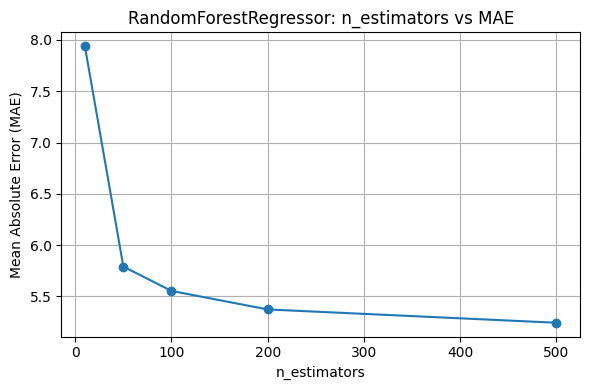

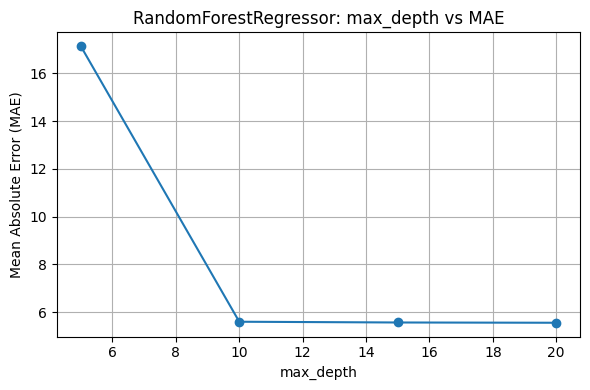

In [61]:
plt.figure(figsize=(6, 4))
plt.plot(n_estimators_vals, mae_scores_n_estimators_reg, marker='o')
plt.xlabel("n_estimators")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("RandomForestRegressor: n_estimators vs MAE")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
plt.plot(max_depth_vals, mae_scores_max_depth_reg, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("RandomForestRegressor: max_depth vs MAE")
plt.grid(True)
plt.tight_layout()
plt.show()

MAE: 18.28
MSE: 601.57
RMSE: 24.53
R2 Score: 0.99
Model Accuracy (R² Score): 0.99
Train R² Score: 0.99
Test R² Score: 0.99


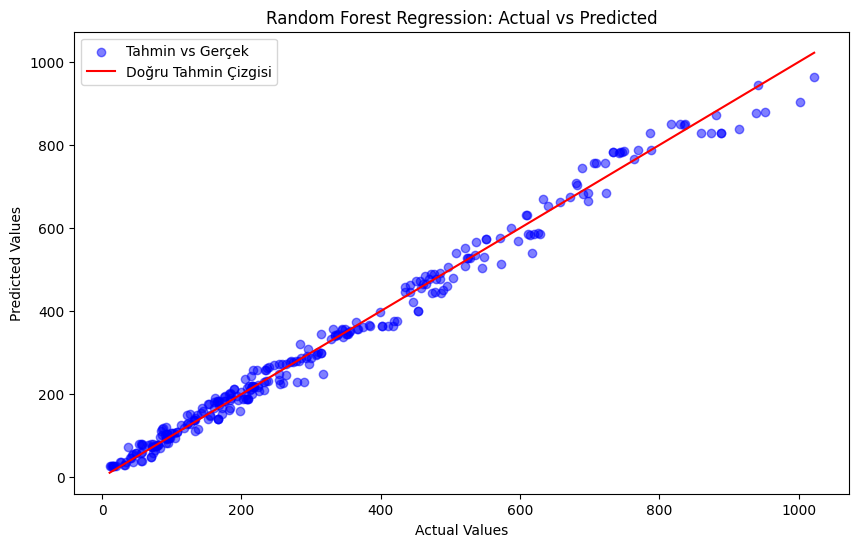

In [62]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)


mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")
accuracy = rf_model.score(X_val, y_val)  # This returns R² score
print(f"Model Accuracy (R² Score): {accuracy:.2f}")
train_r2 = rf_model.score(X_train, y_train)
test_r2 = rf_model.score(X_val, y_val)

print(f"Train R² Score: {train_r2:.2f}")
print(f"Test R² Score: {test_r2:.2f}")



plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5, color='blue', label='Tahmin vs Gerçek')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)],  color='red', label='Doğru Tahmin Çizgisi')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.legend()
plt.show()


In [63]:
from sklearn.ensemble import BaggingRegressor
#bagging regressor
encoder = OneHotEncoder(drop='first', sparse=False) # it just drop the first category to avoid the dummy trap. sparse=False handle the results to be a numpy array.
encoded_cats = encoder.fit_transform(data[['Product line', 'Weekday', 'DayPeriod', 'Payment']]) # learn the unique categories 
#from dataset and transform them into one-hot format.
#encoded_Cats is a numpy array where each categorical columns is replaced with multiple binary columns. 
encoded_columns = encoder.get_feature_names_out(['Product line','Weekday', 'DayPeriod', 'Payment'])
#get_feature_names_out returns the names of the new one-hot encoded dataset. 
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_columns)
numeric_features = data[['Unit price', 'Quantity']]
X = pd.concat([numeric_features, encoded_df], axis=1)
y = data['Total']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.3, random_state= 4)

bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0), n_estimators=10, random_state=0)
bagging_regressor.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0),
                 random_state=0)

In [64]:
bagging_y_predict = bagging_regressor.predict(X_val)

In [65]:
mae_bagging = mean_absolute_error(y_val, bagging_y_predict)
mse_bagging = mean_squared_error(y_val, bagging_y_predict)
print(f"mae: {mae_bagging}")
print(f"mse: {mse_bagging}")
accuracy = rf_model.score(X_val, y_val)  # This returns R² score
print(f"Model Accuracy (R² Score): {accuracy:.2f}")



mae: 7.834119999999998
mse: 141.17343047955003
Model Accuracy (R² Score): 0.99


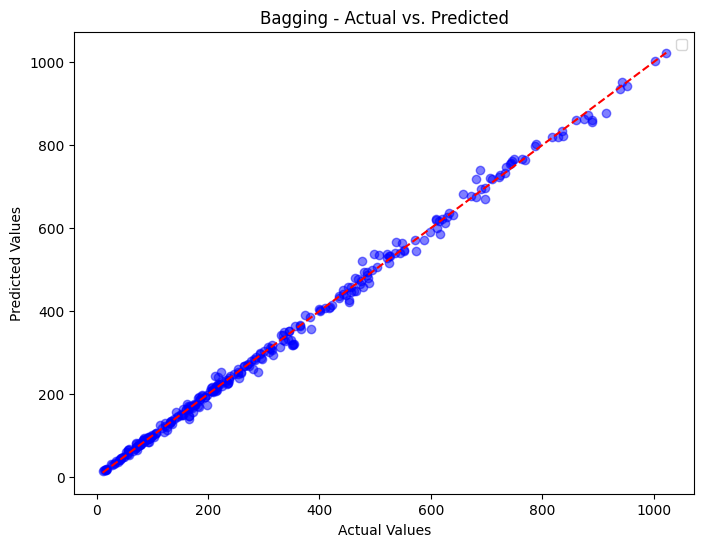

In [66]:
plt.figure(figsize= (8,6))
plt.scatter(y_val, bagging_y_predict, alpha=0.5, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Bagging - Actual vs. Predicted")
plt.legend()
plt.show()

In [67]:
encoder = OneHotEncoder(drop='first', sparse=False) # it just drop the first category to avoid the dummy trap. sparse=False handle the results to be a numpy array.
encoded_cats = encoder.fit_transform(data[['Product line', 'Weekday', 'DayPeriod', 'Payment']]) # learn the unique categories 
#from dataset and transform them into one-hot format.
#encoded_Cats is a numpy array where each categorical columns is replaced with multiple binary columns. 
encoded_columns = encoder.get_feature_names_out(['Product line','Weekday', 'DayPeriod', 'Payment'])
#get_feature_names_out returns the names of the new one-hot encoded dataset. 
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_columns)
numeric_features = data[['Unit price', 'Quantity']]
X = pd.concat([numeric_features, encoded_df], axis=1)
y = data['Total']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.3, random_state= 4)

pasting_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0), # Changed 'base_estimator' to 'estimator'
                                     n_estimators=10,
                                     random_state=0,
                                     bootstrap=False)

In [68]:
pasting_regressor.fit(X_train, y_train)
pasting_y_predict = pasting_regressor.predict(X_val)
mae = mean_absolute_error(y_val,pasting_y_predict)
mse = mean_squared_error(y_val,pasting_y_predict)
print(f"mae: {mae}")
print(f"mse: {mse}")
accuracy_pasting = rf_model.score(X_val, y_val)  # This returns R² score
print(f"Model Accuracy (R² Score): {accuracy_pasting:.2f}")

mae: 7.295883000000002
mse: 121.75890041384999
Model Accuracy (R² Score): 0.99


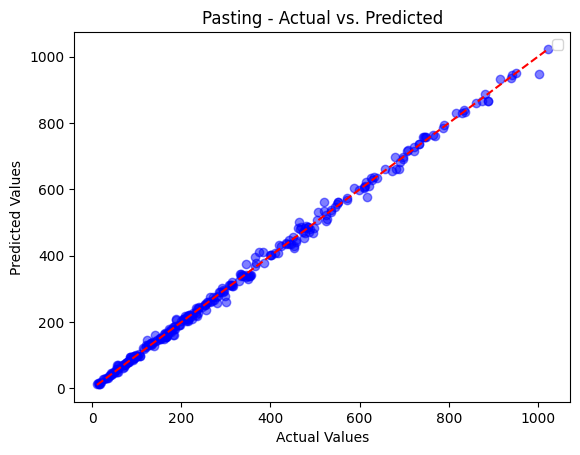

In [69]:
plt.scatter(y_val, pasting_y_predict, alpha=0.5, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Pasting - Actual vs. Predicted")
plt.legend()
plt.show()